# Problem Description

Learning about tree-based methods and interpretability of ML models. The focus here should be to get a just-good-enough model and interpret the relationship between the target and top predictors
Porto Seguro dataset, you should beat the random forest benchmark (0.245 on Kaggle)
Reference: https://www.kaggle.com/c/porto-seguro-safe-driver-prediction

## Initial setup

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#conda install -c conda-forge lightgbm
#pip install xgboost
#!brew install libomp

In [3]:
#imports
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import os

In [4]:
PATH = "Data/porto_seguro_safe_driver_prediction/"

In [217]:
pd.options.display.max_rows=None
pd.options.display.max_columns = None

As mentioned in the description,Values of -1 indicate that the feature was missing from the observation

In [5]:
df_raw = pd.read_csv(f'{PATH}train.csv', low_memory=False, na_values= '-1')

## Exploratory Data Analysis

In [8]:
df_raw.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,NaN,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,NaN,7.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,NaN,0,NaN,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [9]:
df_raw.tail(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1.0,10,0.0,0.0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10.0,1.0,NaN,0,1.0,1,1.0,1,0.0,1,31,3.0,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1.0,3,0.0,0.0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9.0,1.0,NaN,0,NaN,15,0.0,0,2.0,1,63,2.0,0.387298,0.972145,NaN,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1.0,10,0.0,0.0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7.0,1.0,NaN,0,NaN,1,1.0,1,2.0,1,31,3.0,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2.0,3,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11.0,1.0,NaN,0,NaN,11,1.0,1,2.0,1,101,3.0,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1.0,8,0.0,0.0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,NaN,7.0,0.0,NaN,0,NaN,0,1.0,0,2.0,1,34,2.0,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


Count of dependent variable('target') with value 0

In [10]:
np.count_nonzero(df_raw['target'], axis=0)
#Count of target=0

21694

Count of dependent variable('target') with value 1

In [11]:
(df_raw['target'] == 0).sum(axis=0)#Count of target=0

573518

In [12]:
df_raw.shape

(595212, 59)

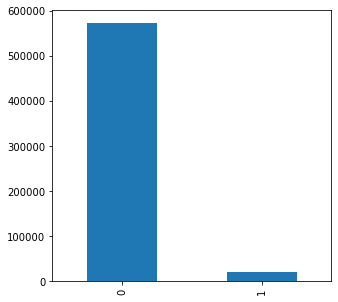

In [13]:
df_raw['target'].value_counts().plot(kind='bar', figsize=(5,5));

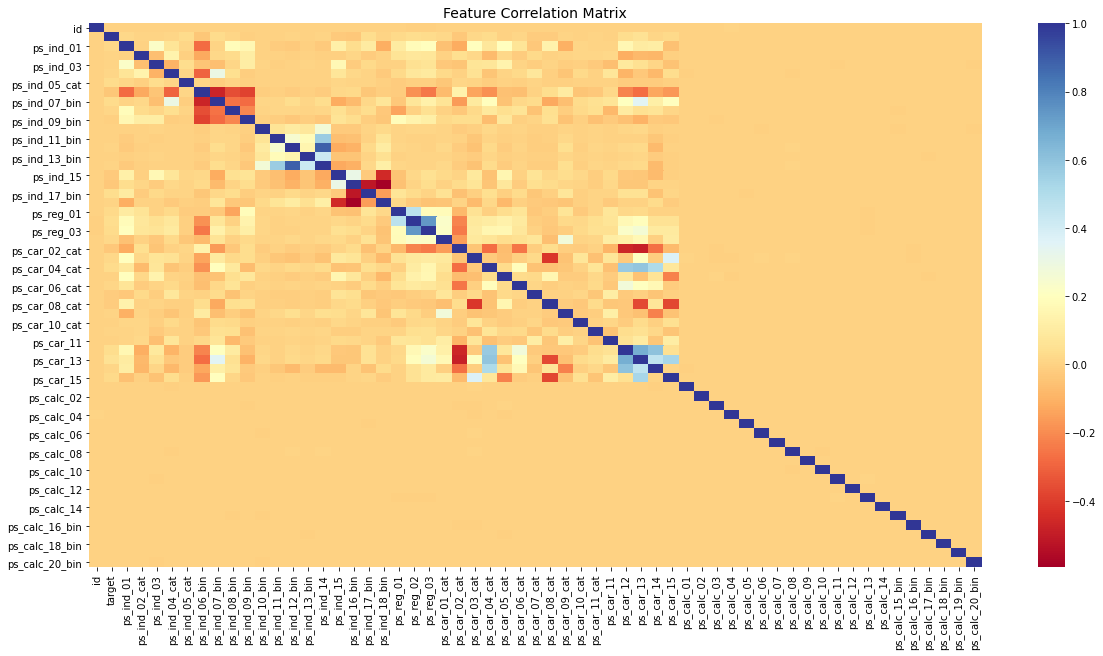

In [14]:
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df_raw.corr()
sns.heatmap(corr, cmap='RdYlBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Feature Correlation Matrix", fontsize=14)
plt.show()

## Preprocessing

In [17]:
train_df_copy = df_raw.copy()

### Removes features which have zero correlaton with target

In [18]:
def remove_calc(data_df):
  for label, content in data_df.items():
    if '_calc' in label:
      data_df.drop([label], axis=1, inplace=True)

  return data_df

In [19]:
train_df_copy = remove_calc(train_df_copy)
train_df_copy.columns.values

array(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15'], dtype=object)

### Check for duplicate columns

In [20]:
train_df_copy.columns.value_counts()

ps_car_11_cat    1
ps_reg_02        1
ps_ind_04_cat    1
ps_ind_07_bin    1
ps_car_04_cat    1
ps_car_11        1
ps_ind_10_bin    1
ps_reg_03        1
ps_ind_18_bin    1
ps_ind_02_cat    1
ps_car_07_cat    1
ps_car_13        1
ps_car_14        1
ps_car_02_cat    1
ps_ind_15        1
id               1
ps_ind_16_bin    1
ps_car_06_cat    1
ps_ind_11_bin    1
ps_car_15        1
ps_car_09_cat    1
ps_car_08_cat    1
ps_ind_06_bin    1
ps_ind_17_bin    1
ps_ind_14        1
ps_ind_12_bin    1
ps_ind_01        1
ps_ind_03        1
ps_ind_08_bin    1
ps_ind_13_bin    1
ps_reg_01        1
ps_car_05_cat    1
ps_car_12        1
ps_ind_09_bin    1
ps_car_10_cat    1
ps_car_01_cat    1
ps_car_03_cat    1
target           1
ps_ind_05_cat    1
dtype: int64

### Identifies count of null or empty column values

In [21]:
df_raw.isna().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


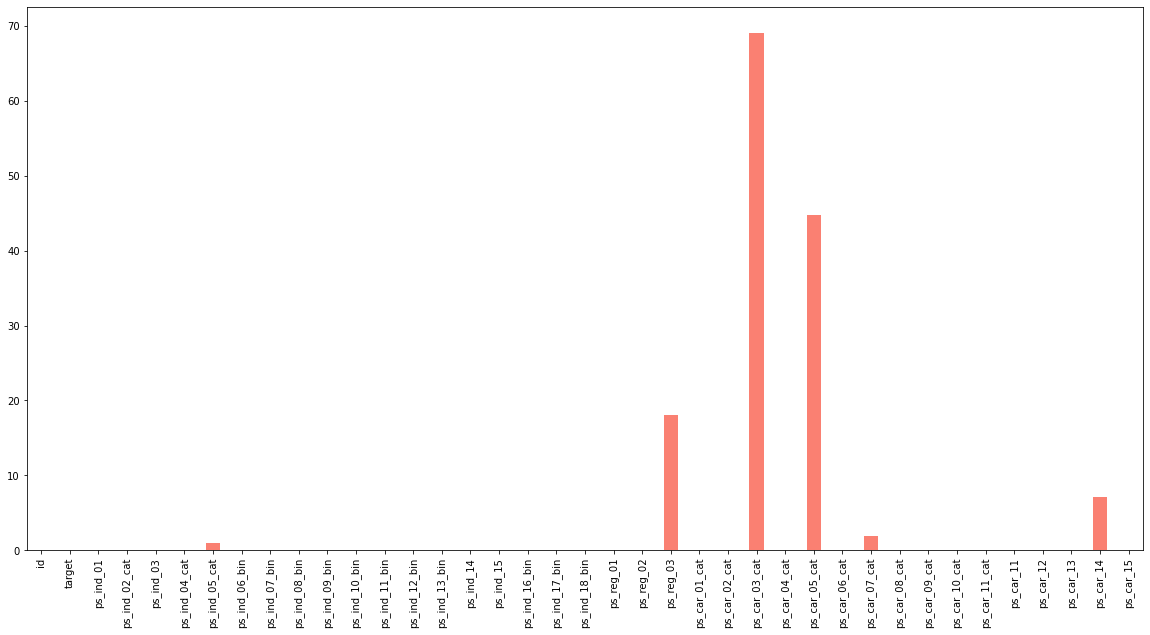

In [22]:
fig, ax = plt.subplots(figsize=(20,10))         
(train_df_copy.isna().sum()*100/len(train_df_copy)).round(2).plot(kind='bar', color='salmon');

### Drops columns with most na values

In [23]:

train_df_copy.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis=1, inplace=True)

In [24]:
train_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 37 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             595212 non-null  int64  
 1   target         595212 non-null  int64  
 2   ps_ind_01      595212 non-null  int64  
 3   ps_ind_02_cat  594996 non-null  float64
 4   ps_ind_03      595212 non-null  int64  
 5   ps_ind_04_cat  595129 non-null  float64
 6   ps_ind_05_cat  589403 non-null  float64
 7   ps_ind_06_bin  595212 non-null  int64  
 8   ps_ind_07_bin  595212 non-null  int64  
 9   ps_ind_08_bin  595212 non-null  int64  
 10  ps_ind_09_bin  595212 non-null  int64  
 11  ps_ind_10_bin  595212 non-null  int64  
 12  ps_ind_11_bin  595212 non-null  int64  
 13  ps_ind_12_bin  595212 non-null  int64  
 14  ps_ind_13_bin  595212 non-null  int64  
 15  ps_ind_14      595212 non-null  int64  
 16  ps_ind_15      595212 non-null  int64  
 17  ps_ind_16_bin  595212 non-nul

In [25]:
train_df_copy.columns.values

array(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_04_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15'], dtype=object)

### Preprocess missing values

In [26]:
categorical_column =[]
categorical_missing_data=[]
not_categorical = []  
# train_target = []
# train_id = []

def preprocess_data(data_df):
  data_df_copy = data_df.copy()

  if 'target' in data_df.columns:
    train_target = data_df.target
    data_df.drop(['target'], axis=1, inplace=True)
  if 'id' in data_df.columns:
    train_id = data_df.id
    data_df.drop(['id'], axis=1, inplace=True) 

  

  for label, content in data_df.items():    
    if '_cat'  in label:
      categorical_column.append(label)
      data_df[label].fillna(value=content.mode()[0], inplace=True)
      data_df[label] = data_df[label].astype('category')

    elif '_bin' in label:
      data_df[label].fillna(value=content.mode()[0], inplace=True)

    else:
      data_df[label].fillna(value=content.median(), inplace=True)
      not_categorical.append(label)    

    
  print(categorical_column)
  if 'target' in data_df_copy.columns:
    data_df.insert(loc=0, column='target', value=train_target)    
    # if (train_target.empty == True) :
      
  if ('id' in data_df_copy.columns):
    data_df.insert(loc=0, column='id', value= train_id)

  return data_df       

preprocessed_train_data = preprocess_data(train_df_copy)

#### Sanity Check for NA feature values after replacement

In [28]:
preprocessed_train_data.isna().sum()

id               0
target           0
ps_ind_01        0
ps_ind_02_cat    0
ps_ind_03        0
ps_ind_04_cat    0
ps_ind_05_cat    0
ps_ind_06_bin    0
ps_ind_07_bin    0
ps_ind_08_bin    0
ps_ind_09_bin    0
ps_ind_10_bin    0
ps_ind_11_bin    0
ps_ind_12_bin    0
ps_ind_13_bin    0
ps_ind_14        0
ps_ind_15        0
ps_ind_16_bin    0
ps_ind_17_bin    0
ps_ind_18_bin    0
ps_reg_01        0
ps_reg_02        0
ps_reg_03        0
ps_car_01_cat    0
ps_car_02_cat    0
ps_car_04_cat    0
ps_car_06_cat    0
ps_car_07_cat    0
ps_car_08_cat    0
ps_car_09_cat    0
ps_car_10_cat    0
ps_car_11_cat    0
ps_car_11        0
ps_car_12        0
ps_car_13        0
ps_car_14        0
ps_car_15        0
dtype: int64

In [29]:
preprocessed_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 37 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   id             595212 non-null  int64   
 1   target         595212 non-null  int64   
 2   ps_ind_01      595212 non-null  int64   
 3   ps_ind_02_cat  595212 non-null  category
 4   ps_ind_03      595212 non-null  int64   
 5   ps_ind_04_cat  595212 non-null  category
 6   ps_ind_05_cat  595212 non-null  category
 7   ps_ind_06_bin  595212 non-null  int64   
 8   ps_ind_07_bin  595212 non-null  int64   
 9   ps_ind_08_bin  595212 non-null  int64   
 10  ps_ind_09_bin  595212 non-null  int64   
 11  ps_ind_10_bin  595212 non-null  int64   
 12  ps_ind_11_bin  595212 non-null  int64   
 13  ps_ind_12_bin  595212 non-null  int64   
 14  ps_ind_13_bin  595212 non-null  int64   
 15  ps_ind_14      595212 non-null  int64   
 16  ps_ind_15      595212 non-null  int64   
 17  ps_ind_16_

In [30]:
preprocessed_train_data.isna().sum()

id               0
target           0
ps_ind_01        0
ps_ind_02_cat    0
ps_ind_03        0
ps_ind_04_cat    0
ps_ind_05_cat    0
ps_ind_06_bin    0
ps_ind_07_bin    0
ps_ind_08_bin    0
ps_ind_09_bin    0
ps_ind_10_bin    0
ps_ind_11_bin    0
ps_ind_12_bin    0
ps_ind_13_bin    0
ps_ind_14        0
ps_ind_15        0
ps_ind_16_bin    0
ps_ind_17_bin    0
ps_ind_18_bin    0
ps_reg_01        0
ps_reg_02        0
ps_reg_03        0
ps_car_01_cat    0
ps_car_02_cat    0
ps_car_04_cat    0
ps_car_06_cat    0
ps_car_07_cat    0
ps_car_08_cat    0
ps_car_09_cat    0
ps_car_10_cat    0
ps_car_11_cat    0
ps_car_11        0
ps_car_12        0
ps_car_13        0
ps_car_14        0
ps_car_15        0
dtype: int64

In [31]:
preprocessed_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 37 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   id             595212 non-null  int64   
 1   target         595212 non-null  int64   
 2   ps_ind_01      595212 non-null  int64   
 3   ps_ind_02_cat  595212 non-null  category
 4   ps_ind_03      595212 non-null  int64   
 5   ps_ind_04_cat  595212 non-null  category
 6   ps_ind_05_cat  595212 non-null  category
 7   ps_ind_06_bin  595212 non-null  int64   
 8   ps_ind_07_bin  595212 non-null  int64   
 9   ps_ind_08_bin  595212 non-null  int64   
 10  ps_ind_09_bin  595212 non-null  int64   
 11  ps_ind_10_bin  595212 non-null  int64   
 12  ps_ind_11_bin  595212 non-null  int64   
 13  ps_ind_12_bin  595212 non-null  int64   
 14  ps_ind_13_bin  595212 non-null  int64   
 15  ps_ind_14      595212 non-null  int64   
 16  ps_ind_15      595212 non-null  int64   
 17  ps_ind_16_

In [32]:
len(preprocessed_train_data)

595212

In [33]:
shuffled_df = preprocessed_train_data

In [34]:
# # Extract Features and target

X = shuffled_df.drop(['target', 'id'], axis=1)
y=  shuffled_df['target']

len(categorical_column), len(categorical_missing_data), len(not_categorical)

(12, 0, 12)

### OneHotEncoding for categorical_columns

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = categorical_column
one_hot = OneHotEncoder(sparse=False)
transformer = ColumnTransformer([('one_hot', one_hot, categorical_features)], remainder='passthrough')

In [38]:
np.where(np.isnan(X[:100]))

(array([], dtype=int64), array([], dtype=int64))

Inserts encoded columns for each of the categorical columns

In [39]:
transformed_x = transformer.fit_transform(X)
shuffled_df_encoded = pd.get_dummies(shuffled_df[categorical_column])

In [40]:
shuffled_df_encoded.head()

,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_3.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_04_cat_1.0,ps_ind_05_cat_0.0,ps_ind_05_cat_1.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,ps_ind_05_cat_4.0,ps_ind_05_cat_5.0,ps_ind_05_cat_6.0,ps_car_01_cat_0.0,ps_car_01_cat_1.0,ps_car_01_cat_2.0,ps_car_01_cat_3.0,ps_car_01_cat_4.0,ps_car_01_cat_5.0,ps_car_01_cat_6.0,ps_car_01_cat_7.0,ps_car_01_cat_8.0,ps_car_01_cat_9.0,ps_car_01_cat_10.0,ps_car_01_cat_11.0,ps_car_02_cat_0.0,ps_car_02_cat_1.0,ps_car_04_cat_0,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_4,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_0,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_16,ps_car_06_cat_17,ps_car_07_cat_0.0,ps_car_07_cat_1.0,ps_car_08_cat_0,ps_car_08_cat_1,ps_car_09_cat_0.0,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_0,ps_car_10_cat_1,ps_car_10_cat_2,ps_car_11_cat_1,ps_car_11_cat_2,ps_car_11_cat_3,ps_car_11_cat_4,ps_car_11_cat_5,ps_car_11_cat_6,ps_car_11_cat_7,ps_car_11_cat_8,ps_car_11_cat_9,ps_car_11_cat_10,ps_car_11_cat_11,ps_car_11_cat_12,ps_car_11_cat_13,ps_car_11_cat_14,ps_car_11_cat_15,ps_car_11_cat_16,ps_car_11_cat_17,ps_car_11_cat_18,ps_car_11_cat_19,ps_car_11_cat_20,ps_car_11_cat_21,ps_car_11_cat_22,ps_car_11_cat_23,ps_car_11_cat_24,ps_car_11_cat_25,ps_car_11_cat_26,ps_car_11_cat_27,ps_car_11_cat_28,ps_car_11_cat_29,ps_car_11_cat_30,ps_car_11_cat_31,ps_car_11_cat_32,ps_car_11_cat_33,ps_car_11_cat_34,ps_car_11_cat_35,ps_car_11_cat_36,ps_car_11_cat_37,ps_car_11_cat_38,ps_car_11_cat_39,ps_car_11_cat_40,ps_car_11_cat_41,ps_car_11_cat_42,ps_car_11_cat_43,ps_car_11_cat_44,ps_car_11_cat_45,ps_car_11_cat_46,ps_car_11_cat_47,ps_car_11_cat_48,ps_car_11_cat_49,ps_car_11_cat_50,ps_car_11_cat_51,ps_car_11_cat_52,ps_car_11_cat_53,ps_car_11_cat_54,ps_car_11_cat_55,ps_car_11_cat_56,ps_car_11_cat_57,ps_car_11_cat_58,ps_car_11_cat_59,ps_car_11_cat_60,ps_car_11_cat_61,ps_car_11_cat_62,ps_car_11_cat_63,ps_car_11_cat_64,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_67,ps_car_11_cat_68,ps_car_11_cat_69,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_73,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_76,ps_car_11_cat_77,ps_car_11_cat_78,ps_car_11_cat_79,ps_car_11_cat_80,ps_car_11_cat_81,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_85,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_91,ps_car_11_cat_92,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_96,ps_car_11_cat_97,ps_car_11_cat_98,ps_car_11_cat_99,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0

In [42]:
shuffled_df.head(10)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,0,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,0.801561,7.0,1.0,0,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,0,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000
5,19,0,5,1.0,4,0.0,0.0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,1.8,2.332649,10.0,0.0,0,14,1.0,1,0.0,1,104,2.0,0.445982,0.879049,0.406202,3.000000
6,20,0,2,1.0,3,1.0,0.0,0,1,0,0,0,0,0,0,0,8,1,0,0,0.6,0.1,0.617454,6.0,1.0,0,11,1.0,1,0.0,1,99,2.0,0.316228,0.639683,0.368782,3.162278
7,22,0,5,1.0,4,0.0,0.0,1,0,0,0,0,0,0,0,0,13,1,0,0,0.7,0.4,0.607248,11.0,1.0,0,11,1.0,1,2.0,1,30,3.0,0.446990,0.900574,0.374833,3.316625
8,26,0,5,1.0,3,1.0,0.0,0,0,1,0,0,0,0,0,0,6,1,0,0,0.9,0.7,0.901388,10.0,1.0,0,14,1.0,1,0.0,1,68,3.0,0.400000,0.780641,0.407431,2.828427
9,28,1,1,1.0,2,0.0,0.0,0,1,0,0,0,0,0,0,0,4,0,0,1,0.9,1.4,2.316652,11.0,0.0,1,14,1.0,1,2.0,1,104,2.0,0.447214,1.458184,0.390256,3.605551


Removes old categorical columns to avoid multicollinearity

In [43]:
shuffled_cat_dropped = shuffled_df.drop(categorical_column, axis=1)
shuffled_cat_dropped.head()

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
0,7,0,2,5,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,2.0,0.400000,0.883679,0.370810,3.605551
1,9,0,1,7,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,3.0,0.316228,0.618817,0.388716,2.449490
2,13,0,5,9,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,0.801561,1.0,0.316228,0.641586,0.347275,3.316625
3,16,0,0,2,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,1.0,0.374166,0.542949,0.294958,2.000000
4,17,0,0,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,3.0,0.316070,0.565832,0.365103,2.000000


Adds one-hot encoded columns

In [44]:
shuffled_upd = pd.concat([shuffled_cat_dropped, shuffled_df_encoded], axis=1)

In [55]:
X = shuffled_upd.drop(['target', 'id'], axis=1)
y=  shuffled_upd['target']

In [53]:
X.describe()

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.877301,2.346105,0.379947,0.813265,0.374605,3.065899
std,1.983789,2.699902,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.314604,0.832493,0.058300,0.224588,0.043948,0.731366
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.061237,0.000000,0.100000,0.250619,0.109545,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.666615,2.000000,0.316228,0.670867,0.353553,2.828427
50%,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.801561,3.000000,0.374166,0.765811,0.373497,3.316625
75%,3.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.900000,0.600000,1.000000,3.000000,0.400000,0.906190,0.396485,3.605551
max,7.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,13.000000,1.000000,1.000000,1.000000,0.900000,1.800000,4.037945,3.000000,1.264911,3.720626,0.636396,3.741657


In [54]:
y.describe()

count    595212.000000
mean          0.036448
std           0.187401
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64

## Feature Importance

Reference: https://github.com/WillKoehrsen/feature-selector/blob/master/Feature%20Selector%20Usage.ipynb

In [56]:
from feature_selector import FeatureSelector
fs = FeatureSelector(X, y)

In [57]:
fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})


0 features with greater than 0.60 missing values.

0 features with a single unique value.

5 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[182]	valid_0's auc: 0.636453	valid_0's binary_logloss: 0.15207
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[129]	valid_0's auc: 0.63723	valid_0's binary_logloss: 0.152156
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[135]	valid_0's auc: 0.642213	valid_0's binary_logloss: 0.151664
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[98]	valid_0's auc: 0.6423	valid_0's binary_logloss: 0.15183
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[119]	valid_0's auc: 0.638933	valid_0's binary_logloss: 0.152158
Training un

In [59]:
shuffled_df_removed_all_once = fs.remove(methods = 'all', keep_one_hot = True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 48 features.


In [60]:
shuffled_df_removed_all_once.shape

(595212, 145)

In [61]:
shuffled_df_removed_all_once.head(1)

,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_ind_02_cat_1.0,ps_ind_02_cat_2.0,ps_ind_02_cat_4.0,ps_ind_04_cat_0.0,ps_ind_05_cat_0.0,ps_ind_05_cat_1.0,ps_ind_05_cat_2.0,ps_ind_05_cat_3.0,ps_ind_05_cat_4.0,ps_ind_05_cat_5.0,ps_ind_05_cat_6.0,ps_car_01_cat_0.0,ps_car_01_cat_1.0,ps_car_01_cat_2.0,ps_car_01_cat_3.0,ps_car_01_cat_4.0,ps_car_01_cat_5.0,ps_car_01_cat_6.0,ps_car_01_cat_7.0,ps_car_01_cat_8.0,ps_car_01_cat_9.0,ps_car_01_cat_10.0,ps_car_01_cat_11.0,ps_car_02_cat_0.0,ps_car_04_cat_0,ps_car_04_cat_1,ps_car_04_cat_2,ps_car_04_cat_3,ps_car_04_cat_5,ps_car_04_cat_6,ps_car_04_cat_7,ps_car_04_cat_8,ps_car_04_cat_9,ps_car_06_cat_0,ps_car_06_cat_1,ps_car_06_cat_2,ps_car_06_cat_3,ps_car_06_cat_4,ps_car_06_cat_5,ps_car_06_cat_6,ps_car_06_cat_7,ps_car_06_cat_8,ps_car_06_cat_9,ps_car_06_cat_10,ps_car_06_cat_11,ps_car_06_cat_12,ps_car_06_cat_13,ps_car_06_cat_14,ps_car_06_cat_15,ps_car_06_cat_17,ps_car_07_cat_0.0,ps_car_08_cat_0,ps_car_09_cat_0.0,ps_car_09_cat_1.0,ps_car_09_cat_2.0,ps_car_09_cat_3.0,ps_car_09_cat_4.0,ps_car_10_cat_0,ps_car_11_cat_1,ps_car_11_cat_2,ps_car_11_cat_3,ps_car_11_cat_4,ps_car_11_cat_5,ps_car_11_cat_6,ps_car_11_cat_7,ps_car_11_cat_11,ps_car_11_cat_12,ps_car_11_cat_17,ps_car_11_cat_18,ps_car_11_cat_21,ps_car_11_cat_23,ps_car_11_cat_25,ps_car_11_cat_26,ps_car_11_cat_27,ps_car_11_cat_28,ps_car_11_cat_30,ps_car_11_cat_31,ps_car_11_cat_32,ps_car_11_cat_33,ps_car_11_cat_34,ps_car_11_cat_36,ps_car_11_cat_37,ps_car_11_cat_38,ps_car_11_cat_39,ps_car_11_cat_40,ps_car_11_cat_41,ps_car_11_cat_42,ps_car_11_cat_43,ps_car_11_cat_45,ps_car_11_cat_46,ps_car_11_cat_50,ps_car_11_cat_51,ps_car_11_cat_53,ps_car_11_cat_55,ps_car_11_cat_60,ps_car_11_cat_61,ps_car_11_cat_63,ps_car_11_cat_64,ps_car_11_cat_65,ps_car_11_cat_66,ps_car_11_cat_70,ps_car_11_cat_71,ps_car_11_cat_72,ps_car_11_cat_74,ps_car_11_cat_75,ps_car_11_cat_78,ps_car_11_cat_80,ps_car_11_cat_82,ps_car_11_cat_83,ps_car_11_cat_84,ps_car_11_cat_86,ps_car_11_cat_87,ps_car_11_cat_88,ps_car_11_cat_89,ps_car_11_cat_90,ps_car_11_cat_93,ps_car_11_cat_94,ps_car_11_cat_95,ps_car_11_cat_97,ps_car_11_cat_100,ps_car_11_cat_101,ps_car_11_cat_102,ps_car_11_cat_103,ps_car_11_cat_104
0,2,5,0,1,0,0,0,0,0,11,0,1,0,0.7,0.2,0.71807,2.0,0.4,0.883679,0.37081,3.605551,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


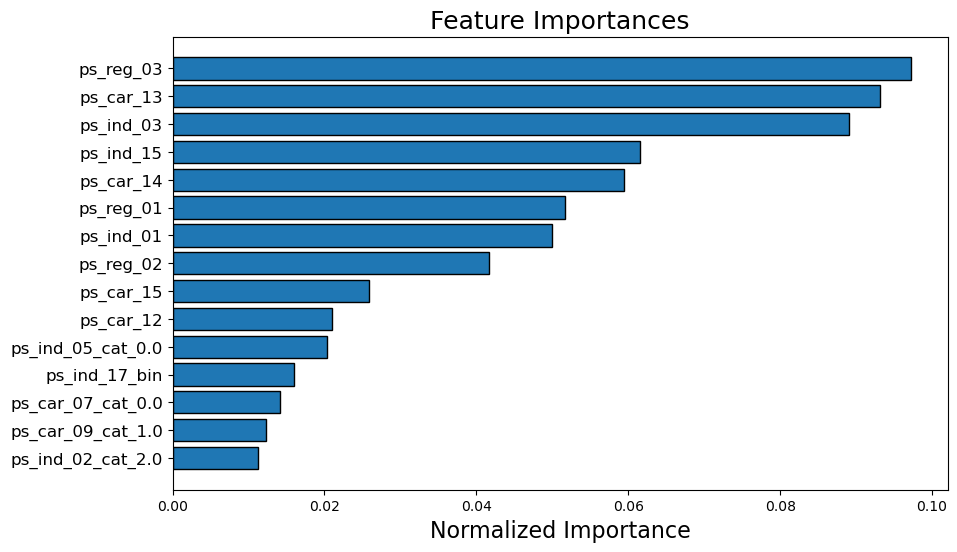

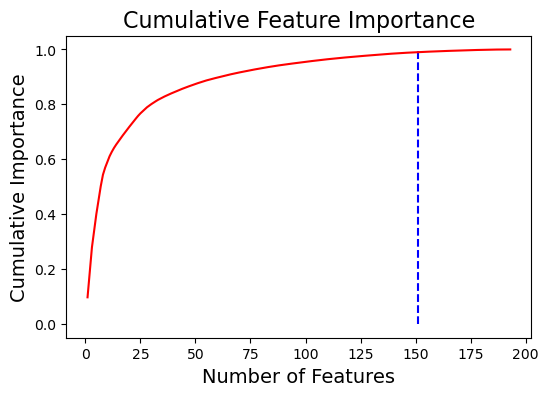

151 features required for 0.99 of cumulative importance


In [62]:
fs.plot_feature_importances(plot_n = 15, threshold=0.99)

In [63]:
preferred_features = np.array(fs.feature_importances[fs.feature_importances['cumulative_importance']<0.990402]['feature'])

In [64]:
len(preferred_features)

151

In [65]:
preferred_features.size

151

In [66]:
preferred_data = fs.data[preferred_features]
preferred_data.head()

,ps_reg_03,ps_car_13,ps_ind_03,ps_ind_15,ps_car_14,ps_reg_01,ps_ind_01,ps_reg_02,ps_car_15,ps_car_12,ps_ind_05_cat_0.0,ps_ind_17_bin,ps_car_07_cat_0.0,ps_car_09_cat_1.0,ps_ind_02_cat_2.0,ps_ind_04_cat_0.0,ps_car_01_cat_7.0,ps_ind_07_bin,ps_ind_16_bin,ps_ind_05_cat_6.0,ps_ind_06_bin,ps_car_11,ps_ind_02_cat_1.0,ps_ind_05_cat_2.0,ps_car_09_cat_0.0,ps_car_01_cat_9.0,ps_car_04_cat_2,ps_ind_09_bin,ps_car_01_cat_11.0,ps_ind_08_bin,ps_car_01_cat_8.0,ps_car_06_cat_9,ps_car_01_cat_6.0,ps_car_01_cat_4.0,ps_car_08_cat_0,ps_car_09_cat_2.0,ps_ind_05_cat_4.0,ps_car_06_cat_17,ps_car_11_cat_21,ps_ind_18_bin,ps_car_11_cat_55,ps_car_06_cat_1,ps_car_11_cat_65,ps_car_01_cat_10.0,ps_car_02_cat_0.0,ps_car_11_cat_31,ps_car_06_cat_15,ps_car_06_cat_3,ps_car_09_cat_4.0,ps_car_11_cat_80,ps_car_11_cat_46,ps_ind_12_bin,ps_car_11_cat_100,ps_car_11_cat_72,ps_car_11_cat_40,ps_car_06_cat_11,ps_car_04_cat_6,ps_ind_14,ps_car_06_cat_5,ps_car_11_cat_90,ps_car_01_cat_3.0,ps_ind_05_cat_3.0,ps_ind_02_cat_4.0,ps_car_11_cat_93,ps_car_11_cat_17,ps_car_04_cat_0,ps_car_06_cat_0,ps_car_10_cat_1,ps_car_11_cat_63,ps_car_09_cat_3.0,ps_car_11_cat_34,ps_car_11_cat_41,ps_car_11_cat_104,ps_ind_04_cat_1.0,ps_car_01_cat_5.0,ps_car_04_cat_1,ps_car_11_cat_25,ps_car_11_cat_64,ps_car_11_cat_26,ps_car_06_cat_12,ps_car_11_cat_50,ps_car_11_cat_83,ps_car_11_cat_94,ps_ind_05_cat_1.0,ps_car_06_cat_10,ps_car_01_cat_1.0,ps_car_06_cat_7,ps_car_10_cat_0,ps_car_06_cat_6,ps_car_11_cat_1,ps_car_11_cat_7,ps_car_04_cat_7,ps_car_11_cat_70,ps_car_11_cat_38,ps_car_11_cat_87,ps_car_11_cat_42,ps_car_01_cat_0.0,ps_car_11_cat_75,ps_car_11_cat_4,ps_car_11_cat_3,ps_car_11_cat_103,ps_car_11_cat_33,ps_car_11_cat_97,ps_car_11_cat_18,ps_car_02_cat_1.0,ps_car_01_cat_2.0,ps_car_11_cat_32,ps_car_11_cat_39,ps_car_06_cat_4,ps_car_11_cat_23,ps_car_11_cat_51,ps_car_11_cat_74,ps_car_11_cat_61,ps_car_11_cat_95,ps_car_11_cat_28,ps_car_06_cat_8,ps_car_11_cat_6,ps_car_11_cat_82,ps_car_11_cat_45,ps_car_11_cat_84,ps_car_06_cat_14,ps_car_11_cat_12,ps_car_07_cat_1.0,ps_car_11_cat_5,ps_ind_05_cat_5.0,ps_car_06_cat_13,ps_car_04_cat_5,ps_car_11_cat_86,ps_car_06_cat_2,ps_car_11_cat_66,ps_car_11_cat_36,ps_car_08_cat_1,ps_car_11_cat_71,ps_car_11_cat_89,ps_car_11_cat_30,ps_car_11_cat_2,ps_car_11_cat_101,ps_car_11_cat_88,ps_car_11_cat_60,ps_car_11_cat_27,ps_car_11_cat_53,ps_car_11_cat_37,ps_car_04_cat_9,ps_car_11_cat_102,ps_ind_11_bin,ps_car_11_cat_43,ps_car_04_cat_3,ps_car_11_cat_78,ps_car_11_cat_11,ps_car_04_cat_8,ps_car_11_cat_99
0,0.718070,0.883679,5,11,0.370810,0.7,2,0.2,3.605551,0.400000,1,1,0,0,1,0,0,1,0,0,0,2.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.766078,0.618817,7,3,0.388716,0.8,1,0.4,2.449490,0.316228,1,0,0,0,0,1,0,0,0,0,0,3.0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.801561,0.641586,9,12,0.347275,0.0,5,0.0,3.316625,0.316228,1,0,0,0,0,0,1,0,1,0,0,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0.580948,0.542949,2,8,0.294958,0.9,0,0.2,2.000000,0.374166,1,0,0,0,0,1,1,0,1,0,1,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.840759,0.565832,0,9,0.365103,0.7,0,0.6,2.000000,0.316070,1,0,0,0,1,0,0,0,1,0,1,3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Model Train

Reference:https://towardsdatascience.com/data-science-quick-tip-003-using-scikit-learn-pipelines-66f652f26954

In [68]:
import joblib
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

Normally distributes data using StandardScaler

In [70]:
X = StandardScaler().fit_transform(preferred_data)

In [71]:
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
0,-0.506132,0.313526,0.213594,1.043440,-0.086358,0.309442,0.050218,-0.591654,0.737869,0.343963,0.33913,2.694238,-0.232701,-0.226641,1.953633,-1.182566,-0.656444,1.700163,-1.395821,-0.189637,-0.805893,-0.415746,-1.627434,-0.084138,1.435247,-0.188019,-0.203952,-0.476919,-0.732055,-0.442786,-0.161298,-0.174644,-0.342198,-0.214469,2.226032,-1.211656,-0.178324,-0.091436,-0.063946,-0.425746,-0.084592,-0.498276,-0.136613,3.299024,-0.452653,-0.094651,-0.194666,-0.143424,-0.068835,-0.098418,-0.095281,-0.097615,-0.086742,-0.069693,-0.090827,-0.532594,-0.051262,-0.097621,-0.048573,-0.094687,-0.10636,-0.118432,-0.139601,-0.070347,-0.081485,0.445668,-0.47725,0.092347,-0.043088,-0.159441,-0.089777,-0.073313,-0.408396,1.182566,-0.177308,-0.238815,-0.089186,-0.19719,-0.076355,-0.063441,-0.055458,-0.127424,-0.075245,-0.119079,-0.24408,-0.047979,-0.167045,-0.090704,-0.191006,-0.075019,-0.097921,-0.015283,-0.112806,-0.125615,-0.172017,-0.09152,-0.100093,-0.053171,-0.051852,-0.073347,-0.206141,-0.054922,-0.049995,-0.045561,0.452653,-0.060126,-0.146929,-0.114301,4.256351,-0.053012,-0.100979,-0.091809,-0.069241,-0.077548,-0.14669,-0.048764,-0.064684,-0.133811,-0.053614,-0.091043,-0.332498,9.007970,0.232701,-0.146541,-0.052708,-0.102981,-0.030273,-0.079294,-0.052031,-0.072345,-0.07066,-2.226032,-0.063053,-0.092319,-0.062581,-0.065633,-0.111732,-0.087505,-0.116661,-0.100315,-0.088802,-0.092115,-0.181755,-0.059546,-0.041167,-0.074792,-0.032809,-0.111693,-0.106828,-0.189332,-0.143698
1,-0.353536,-0.865800,0.954362,-1.212598,0.321078,0.657096,-0.453868,-0.096928,-0.842820,-1.092966,0.33913,-0.371162,-0.232701,-0.226641,-0.511867,0.845619,-0.656444,-0.588179,-1.395821,-0.189637,-0.805893,0.785466,0.614464,-0.084138,-0.696744,-0.188019,-0.203952,-0.476919,1.366018,2.258425,-0.161298,-0.174644,-0.342198,-0.214469,-0.449230,0.825317,-0.178324,-0.091436,-0.063946,2.348817,-0.084592,-0.498276,-0.136613,-0.303120,-0.452653,-0.094651,-0.194666,-0.143424,-0.068835,-0.098418,-0.095281,-0.097615,-0.086742,-0.069693,-0.090827,1.877604,-0.051262,-0.097621,-0.048573,-0.094687,-0.10636,-0.118432,-0.139601,-0.070347,-0.081485,0.445668,-0.47725,0.092347,-0.043088,-0.159441,-0.089777,-0.073313,-0.408396,-0.845619,-0.177308,-0.238815,-0.089186,-0.19719,-0.076355,-0.063441,-0.055458,-0.127424,-0.075245,-0.119079,-0.24408,-0.047979,-0.167045,-0.090704,-0.191006,-0.075019,-0.097921,-0.015283,-0.112806,-0.125615,-0.172017,-0.09152,-0.100093,-0.053171,-0.051852,-0.073347,-0.206141,-0.054922,-0.049995,-0.045561,0.452653,-0.060126,-0.146929,-0.114301,-0.234943,-0.053012,-0.100979,-0.091809,-0.069241,-0.077548,-0.14669,-0.048764,-0.064684,-0.133811,-0.053614,-0.091043,-0.332498,-0.111013,0.232701,-0.146541,-0.052708,-0.102981,-0.030273,-0.079294,-0.052031,-0.072345,-0.07066,0.449230,-0.063053,-0.092319,-0.062581,-0.065633,-0.111732,-0.087505,-0.116661,-0.100315,-0.088802,-0.092115,-0.181755,-0.059546,-0.041167,-0.074792,-0.032809,-0.111693,-0.106828,-0.189332,-0.143698
2,-0.240749,-0.764418,1.695130,1.325445,-0.621876,-2.124135,1.562477,-1.086380,0.342818,-1.092966,0.33913,-0.371162,-0.232701,-0.226641,-0.511867,-1.182566,1.523360,-0.588179,0.716424,-0.189637,-0.805893,-1.616957,-1.627434,-0.084138,-0.696744,-0.188019,-0.203952,-0.476919,-0.732055,2.258425,-0.161298,-0.174644,-0.342198,-0.214469,-0.449230,0.825317,-0.178324,-0.091436,-0.063946,-0.425746,-0.084592,-0.498276,-0.136613,-0.303120,-0.452653,-0.094651,-0.194666,-0.143424,-0.068835,-0.098418,-0.095281,-0.097615,-0.086742,-0.069693,-0.

### Splitting a dataset

In [110]:
X_train, X_test ,y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

In [77]:
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
count,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000,476169.000000
mean,0.000220,-0.001529,0.000226,-0.000253,-0.000492,0.000059,0.000315,0.000450,-0.000793,-0.001050,-0.000379,0.000675,-0.001084,-0.001549,0.000377,0.000528,0.001257,-0.000635,-0.000535,0.000567,0.000108,-0.000145,-0.000040,0.000523,-0.000610,0.001036,-0.000032,0.000092,-0.000559,0.000509,-0.000125,-0.000119,-0.000791,-0.000217,-0.001429,0.001170,0.000399,-0.000208,-0.000666,0.000202,-0.001205,-0.000019,0.000376,-0.000927,-0.001400,0.000314,0.000072,0.000021,0.000319,-0.000280,0.000200,-0.000986,-0.000610,-0.000200,0.000816,-0.000726,0.000247,-0.001017,-0.001291,0.000264,-0.000747,-0.000618,-0.001003,-0.001014,-0.000073,0.000716,-0.000264,-0.000220,0.001055,0.000151,-0.000028,0.000386,-0.000188,-0.000528,0.000311,-0.000901,0.000105,0.000472,-0.001272,-0.000891,0.000570,0.000101,-0.000107,0.000061,-0.000426,0.000895,0.000667,0.000126,0.001814,0.000090,-0.000593,-0.000027,0.000732,0.000004,-0.000475,-0.000398,-0.000152,0.000578,-0.001170,0.000432,-0.000165,0.001534,0.000539,-0.000480,0.001400,0.001045,-0.000926,0.000581,0.001370,0.000262,-0.000092,-0.001269,-0.000244,0.000670,-0.000605,-0.001105,0.001402,-0.000032,0.000479,-0.001009,0.000180,0.000617,0.001084,-0.000869,-0.000687,-0.000841,-0.000625,-0.000245,-0.000469,-0.000006,0.000370,0.001429,-0.000388,0.000482,0.000182,-0.000206,0.000015,-0.001195,0.000299,0.000952,-0.001397,-0.000055,-0.000217,-0.000120,-0.000

In [78]:
X_test.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150
count,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000,119043.000000
mean,-0.000880,0.006117,-0.000906,0.001010,0.001969,-0.000235,-0.001261,-0.001800,0.003174,0.004200,0.001515,-0.002701,0.004337,0.006195,-0.001506,-0.002112,-0.005028,0.002538,0.002140,-0.002268,-0.000434,0.000581,0.000161,-0.002092,0.002439,-0.004146,0.000128,-0.000370,0.002235,-0.002035,0.000501,0.000475,0.003163,0.000867,0.005715,-0.004681,-0.001595,0.000833,0.002664,-0.000809,0.004820,0.000077,-0.001504,0.003708,0.005601,-0.001254,-0.000288,-0.000084,-0.001276,0.001120,-0.000801,0.003944,0.002439,0.000799,-0.003264,0.002905,-0.000986,0.004070,0.005166,-0.001057,0.002987,0.002474,0.004011,0.004056,0.000290,-0.002862,0.001057,0.000881,-0.004219,-0.000606,0.000113,-0.001544,0.000752,0.002112,-0.001242,0.003605,-0.000418,-0.001886,0.005090,0.003563,-0.002279,-0.000403,0.000426,-0.000244,0.001705,-0.003580,-0.002668,-0.000505,-0.007258,-0.000361,0.002373,0.000110,-0.002927,-0.000014,0.001900,0.001591,0.000610,-0.002313,0.004678,-0.001728,0.000662,-0.006137,-0.002156,0.001921,-0.005601,-0.004179,0.003702,-0.002324,-0.005479,-0.001049,0.000369,0.005074,0.000975,-0.002681,0.002421,0.004420,-0.005608,0.000127,-0.001917,0.004037,-0.000720,-0.002467,-0.004337,0.003477,0.002749,0.003363,0.002499,0.000980,0.001878,0.000023,-0.001482,-0.005715,0.001551,-0.001928,-0.000728,0.000822,-0.000061,0.004778,-0.001198,-0.003807,0.005587,0.000220,0.000868,0.000481,0.000327,0.005737,

## Hyperparameter Tunning of the model

In [132]:
from sklearn.model_selection import StratifiedKFold
from datetime import datetime

In [129]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


Model parameters

In [130]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [131]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=-1)

In [133]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

start_time = timer(None)

In [134]:
# X_train_subset=X_train.loc[:10000]
# y_train_subset=y_train.loc[:10000]

In [135]:
random_search.fit(X_train, y_train)
timer(start_time)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 43.7min remaining: 65.5min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 67.0min remaining: 16.8min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 70.6min finished
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:00:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:00:57] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 1 hours 19 minutes and 4.6 seconds.


In [136]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [137]:
random_search.best_params_

{'subsample': 0.8,
 'min_child_weight': 5,
 'max_depth': 5,
 'gamma': 1,
 'colsample_bytree': 0.8}

### Fits XGBClassifier with best parameters obtanied

XGBClassifier is gradient boosted decision trees algorithm,
Refit XGBClassifier with best parameters obtained after performing fit on Train data by RandomizedSearchCV

In [158]:
xgb_refit = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=-1,subsample= 0.8,
 min_child_weight= 5,
 max_depth= 5,
 gamma= 1,
 colsample_bytree= 0.8)

In [159]:
xgb_refit.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:20:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:20:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

### Evaluation of model

#### roc_auc_score of Train dataset

In [160]:
pred_prob1 =xgb_refit.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, pred_prob1)

0.6765156204568264

#### roc_auc_score of Test dataset

In [161]:
pred_prob2 =xgb_refit.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, pred_prob2)

0.6437868087618205

#### Confusion matrix and accuracy

In [143]:
#accuracy
from sklearn.metrics import confusion_matrix

pred1 = random_search.predict(X_train)
confusion_matrix(y_train, pred1)


array([[516215,      0],
       [ 19471,      4]])

In [144]:
metrics.accuracy_score(y_train, pred1)

0.9636524855793462

In [145]:
pred2 = random_search.predict(X_test)
confusion_matrix(y_test, pred2)

array([[57303,     0],
       [ 2218,     1]])

In [146]:
metrics.accuracy_score(y_test, pred2)

0.9627364671886025

#### Normalized Gini coefficient
Reference: 
1. https://stats.stackexchange.com/questions/155310/what-is-the-difference-between-gini-and-auc-curve-interpretation
2. https://luckytoilet.wordpress.com/2018/04/04/useful-properties-of-roc-curves-auc-scoring-and-gini-coefficients/

In [173]:
# Calculating the normalized gini coefficient.
def ginic(actual, pred):
    actual = np.asarray(actual) #In case, someone passes Series or list
    n = len(actual)
    a_s = actual[np.argsort(pred)]
    a_c = a_s.cumsum()
    giniSum = a_c.sum() / a_s.sum() - (n + 1) / 2.0
    return giniSum / n
 
def gini_normalizedc(a, p):
    if p.ndim == 2:#Required for sklearn wrapper
        p = p[:,1] #If proba array contains proba for both 0 and 1 classes, just pick class 1
    return ginic(a, p) / ginic(a, a)

In [174]:
gini_normalizedc(y_test, pred_prob2)

0.28757364111682693

In [ ]:
===================================================

###  Model#2 

Trying out with different set of hyperparameters 

In [162]:
#Model#2
X_train1, X_test1 ,y_train1, y_test1 = train_test_split(X, y,test_size=0.2, random_state = 42)

In [163]:
params = {
        'min_child_weight': [1, 5],
        'gamma': [1, 1.5],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [5,7]
        }

In [164]:
xgb1 = XGBClassifier(learning_rate=0.03, n_estimators=200, objective='binary:logistic',
                    silent=True, nthread=-1)

In [165]:
folds = 5
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_test,y_test), verbose=3, random_state=1001 )
random_search1 = RandomizedSearchCV(xgb1, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=-1, cv=skf.split(X_train1,y_train1), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable

In [166]:
random_search1.fit(X_train1, y_train1)
timer(start_time) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 45.7min
/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 112.1min finished
/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:29:08] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:29:10] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 1 hours 56 minutes and 14.07 seconds.


In [167]:
random_search1.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.03, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [168]:
random_search1.best_params_

{'subsample': 0.8,
 'min_child_weight': 5,
 'max_depth': 7,
 'gamma': 1.5,
 'colsample_bytree': 0.8}

In [169]:
xgb_refit1 = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=-1,subsample= 0.8,
 min_child_weight= 5,
 max_depth= 7,
 gamma= 1.5,
 colsample_bytree= 0.8)

In [170]:
xgb_refit1.fit(X_train1, y_train1)

[18:44:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:44:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=7,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              silent=True, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

#### roc_auc_score of Train dataset

In [171]:
pred_prob3 =xgb_refit1.predict_proba(X_train1)[:, 1]
roc_auc_score(y_train1, pred_prob3)

0.7266567222347111

#### roc_auc_score of Test dataset

In [172]:
pred_prob4 =xgb_refit.predict_proba(X_test1)[:, 1]
roc_auc_score(y_test1, pred_prob4)

0.6605403451279123

#### Normalized Gini coefficient

In [175]:
gini_normalizedc(y_test1, pred_prob4)

0.32108068229998477

In [ ]:
================THE END==================

## Unwanted code for future reference if needed 

In [68]:
# rfc_pipeline = Pipeline([
#     #('features',feats),
#     ('classifier', RandomForestClassifier(random_state = 42))
#     #('classifier', GradientBoostingClassifier(random_state = 42))
# ])

# rfc_pipeline.fit(X_train, y_train)


In [69]:
# A parameter grid for XGBoost
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

In [70]:
# xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
#                     silent=True, nthread=1)

In [88]:
# X_train_subset=X_train.iloc[:1000]
# y_train_subset=y_train.iloc[:1000]

In [73]:
# from sklearn.model_selection import StratifiedKFold

In [74]:
# folds = 3
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)



In [75]:
# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=3, verbose=3, random_state=1001)

In [76]:
# random_search.fit(X_train_subset, y_train_subset)

In [77]:
# Creating our pipeline that first scales the data, then fits the data to a RandomForsestClassifier
#Ref: https://stackoverflow.com/questions/64089009/how-can-i-tune-the-parameters-in-a-random-forest-classifier-inside-a-pipeline
# rfc_pipeline = Pipeline(steps = [
#      ('classifier', RandomForestClassifier(random_state = 42))
# ])

#Ref

In [78]:
# rfc_pipeline.fit(X_train_subset, y_train_subset)

In [79]:
# hyperparameters = { #'features__text__tfidf__max_df': [0.9, 0.95],
#                     #'features__text__tfidf__ngram_range': [(1,1), (1,2)],
#                     #'classifier__learning_rate': [0.1, 0.2],
#                     'classifier__n_estimators': [20, 30, 50],
#                     'classifier__max_depth': [2, 4],
#                     'classifier__min_samples_leaf': [2, 4]
#                   }
# clf = GridSearchCV(rfc_pipeline, hyperparameters, cv = 3)
 
# # Fit and tune model
# clf.fit(X_train_subset, y_train_subset)

In [80]:
# params = {'eta': 0.2,
#           'max_depth': 4,
#           'objective': 'binary:logistic',
#           'eval_metric': 'auc',
#           'silent': True}

# features = X_train_subset.columns
# submission = X_train_subset['id'].to_frame()
# submission['target']=0

# kfold = 3
# skf = StratifiedKFold(n_splits=kfold)
# for i, (train_index, test_index) in enumerate(skf.split(X_train_subset, y_train_subset)):
#     print(' xgb kfold: {}  of  {} : '.format(i+1, kfold))
#     X_train1, X_valid1 = X_train_subset.loc[train_index], X.loc[test_index]
#     Y_train1, Y_valid1 = y_train_subset.loc[train_index], Y.loc[test_index]
#     d_train = xgb.DMatrix(X_train1, Y_train1) 
#     d_valid = xgb.DMatrix(X_valid1, Y_valid1) 
#     watchlist = [(d_train, 'train1'), (d_valid, 'valid1')]
#     xgb_model = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=100, 
#                         feval=gini_xgb, maximize=True, verbose_eval=100)
#     submission['target'] += xgb_model.predict(xgb.DMatrix(X_train_subset[features]), 
#                         ntree_limit=xgb_model.best_ntree_limit+50) / (kfold)
# gc.collect()
# submission.head(2)


In [185]:
#HyperParam
# from sklearn.ensemble import GradientBoostingClassifier

In [192]:
# rfc_pipeline = Pipeline([
#     #('features',feats),
# #     ('classifier', RandomForestClassifier(random_state = 42))
#     ('model', GradientBoostingClassifier(random_state = 42))
# ])

# gbc_pipeline = Pipeline(
#  'n_estimators': [100,200,300],
#     'learning_rate': [.1,.3],
#     'max_depth': [3,5]
# )

   

In [ ]:
# gb_params = {
#     'n_estimators' : [100,200,300],
#     'learning_rate' : [.1,.2,.3],
#     'max_depth' : [3,5,7]
# }

# gb_class = GradientBoostingClassifier()

# gb_grid = GridSearchCV(gb_class, gb_params, cv = 5, n_jobs=-1)
# gb_grid.fit(X_train, y_train)

# gb_grid.best_estimator_

In [187]:
# param_grid = {
#     "model__n_estimators": [100, 200, 500],
#     "model__max_depth": [1, 5, 10, 25],
# #     "model__max_features": [*np.arange(0.1, 1.1, 0.2)],
# 'min_samples_split': [2, 5, 10]
# # ,'min_samples_leaf': range(2,20,2)
# }
# # https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74x

# param_grid = {
#     "model__n_estimators": [100,200,500],
#     "model__max_depth": [5, 10],                     0.7,0.63
#      "model__min_samples_split": [2, 5, 10]
# }


In [176]:
# Metrics roc_auc score
# Perform grid search, fit it, and print score  
# gs = GridSearchCV(estimator=rfc_pipeline, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1000,scoring='roc_auc',refit=True)
# gs.fit(X_train, y_train)
# #print(gs.score())

In [129]:
#HyperParam
# from sklearn.ensemble import GradientBoostingClassifier


In [177]:
# gb_params = {
#     'n_estimators' : [100,200,300],
#     'learning_rate' : [.1,.3],
#     'max_depth' : [3,5]
# }

# gb_class = GradientBoostingClassifier()

# gb_grid = GridSearchCV(gb_class, gb_params, cv = 3, n_jobs=-1)
# gb_grid.fit(X_train, y_train)

# gb_grid.best_estimator_

In [100]:
# gb_grid.best_estimator_

GradientBoostingClassifier()

In [101]:
# gb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [131]:
# gb_opt = GradientBoostingClassifier(criterion='friedman_mse', init=None,
#                             learning_rate=0.1, loss='deviance', max_depth=3,
#                             max_features=None, max_leaf_nodes=None, min_impurity_split=None,
#                             min_samples_leaf=1, min_samples_split=2,
#                             min_weight_fraction_leaf=0.0, n_estimators=100,
#                           random_state=None, subsample=1.0, verbose=0,
#                             warm_start=False)
    

In [178]:
# gb_opt.fit(X_train, y_train)

In [133]:
# #Train data
# pred_prob1 =gb_opt.predict_proba(X_train)[:, 1]

In [134]:
# pred_prob1.shape

(446409,)

In [135]:
# roc_auc_score(y_train, pred_prob1)

0.6504492423081277

In [136]:
#Test data
# pred_prob2 =gb_opt.predict_proba(X_test)[:, 1]

In [137]:
# roc_auc_score(y_test, pred_prob2)

0.6344321051222226

In [73]:
# gs.roc_auc_score()

In [89]:
#TEST score
# pred_prob =gs.predict_proba(X_val)

In [90]:
# auc scores
# auc_score = roc_auc_score(y_val, pred_prob[:,1])
# print("Validation set roc_auc score",auc_score)

Validation set roc_auc score 0.6315298916474991


In [ ]:
#Read csv
# df_test_raw = pd.read_csv(f'{PATH}test.csv', low_memory=False, na_values= '-1')
# #as mentioned in the description,Values of -1 indicate that the feature was missing from the observation

In [36]:
# from sklearn.linear_model import LogisticRegression
# # from sklearn.model_selection import cross_val_score
# # from sklearn.model_selection import RepeatedStratifiedKFold
# # from xgboost import XGBClassifier

# # Model Evaluations
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, auc

In [31]:
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline as make_pipeline_imb
# from imblearn.over_sampling import SMOTE
# from sklearn.ensemble import RandomForestClassifier
# from imblearn.ensemble import BalancedBaggingClassifier
# from sklearn.tree import DecisionTreeClassifier
# import lightgbm as lgb
# from imblearn.ensemble import BalancedRandomForestClassifier


# # build model with embedded undersampling technique 
# # param = {'num_leaves': 31, 'objective': 'binary'}
# # param['metric'] = 'auc'
# mpipeline = make_pipeline_imb(BalancedBaggingClassifier(base_estimator=lgb.LGBMClassifier(n_jobs=-1),
#                                                    sampling_strategy='auto',
#                                                    replacement=False,
#                                                    random_state=0))
# model = mpipeline.fit(X_train, y_train)
# model.score(X_val, y_val)
# bbc_pred = model.predict_proba(X_val)

In [33]:
# build model with SMOTE imblearn
# smote = SMOTE(random_state=42)
# X_res, y_res = smote.fit_resample(X, y)

# X_train2, X_val2, y_train2, y_val2 = train_test_split(X_res, y_res, test_size = 0.2)
# smote_model = LogisticRegression(n_jobs=-1)      #XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)
# smote_model.fit(X_train2, y_train2)
# smote_score = smote_model.score(X_val2, y_val2)

In [34]:
# smote_score
# #One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples 
# #in the minority class, although these examples don’t add any new information to the model

0.9522248570232947

In [35]:
# smote_pred = smote_model.predict_proba(X_val)

In [36]:
# smote_model.score(X_train2, y_train2)

0.952055735003727

In [179]:
# roc_auc_score(y_val,smote_pred) #TODO

In [96]:
# smote_predict = smote_model.predict(X_val)

In [39]:
# model.score(X_train, y_train)

0.6499604132146359

In [40]:
# model.score(X_val, y_val)

0.643817780129869

In [42]:
# smote_pred[:,1]

array([0.99999999, 0.43742567, 0.85573963, ..., 0.13824535, 0.9898473 ,
       0.10562361])

In [43]:
# gini_normalizedc(y_val, bbc_pred[:,1])

0.2829051298121568

In [44]:
# gini_normalizedc(y_val2, smote_pred[:, 1])

0.9407842584296973

In [46]:
# ls Data/porto_seguro_safe_driver_prediction/


sample_submission.csv  test.csv               train.csv


In [181]:
# test_df = pd.read_csv('Data/porto_seguro_safe_driver_prediction/test.csv', low_memory=False, na_values='-1')
# test_df.head()

In [182]:
# test_df.shape

In [183]:
# test_df.isna().sum()

In [50]:
# test_data_no_id = test_df.drop(['id'], axis=1)

In [184]:
# fig, ax = plt.subplots(figsize=(20,10))         
# (test_df.isna().sum()*100/len(test_df)).round(2).plot(kind='bar', color='salmon');

In [186]:
# test_df.drop(['ps_car_03_cat', 'ps_car_05_cat'], axis=1, inplace=True)

In [185]:
# categorical_column=[]
# categorical_missing_data = []
# not_categorical = []
# preprocessed_test_df = preprocess_data(test_df)

In [187]:
# len(categorical_column), len(categorical_missing_data), len(not_categorical)

In [190]:
# preprocessed_test_df.isna().sum()
# #

In [191]:
# preprocessed_test_df.head()


In [192]:
# fig, ax = plt.subplots(figsize=(20,10))         
# # Imbalanced DataFrame Correlation
# corr = preprocessed_test_df.corr()
# sns.heatmap(corr, cmap='RdYlBu', annot_kws={'size':30}, ax=ax)
# ax.set_title("Feature Correlation Matrix", fontsize=14)
# plt.show()

In [193]:
# preprocessed_test_df   = remove_calc(preprocessed_test_df)

In [194]:
# preprocessed_test_df.columns.values

In [195]:
# preprocessed_test_df.head()

In [196]:


# preprocessed_test_df_upd = Encode_Scale(preprocessed_test_df, categorical_column)

In [197]:
# preprocessed_test_df_upd.drop(['id'], axis=1, inplace=True)

In [198]:
# preprocessed_test_data = preprocessed_test_df_upd

In [199]:
# preprocessed_test_data.shape

In [200]:
# preprocessed_test_data.head()

In [201]:
# preprocessed_test_data.head()

In [203]:
# from sklearn.preprocessing import StandardScaler

In [202]:
# X_test = StandardScaler().fit_transform(preprocessed_test_data)

In [204]:
# X_test = pd.DataFrame(X_test)
# X_test.head()

In [205]:
# X_test.shape

In [206]:
# test_pred = smote_model.predict_proba(X_test)

In [207]:
# test_pred[:,1][:20]

In [208]:
# test_pred2 = model.predict_proba(X_test)

In [209]:
# test_pred2[:,1][:20]

In [13]:
# x= df_raw.drop('target',axis=1)
# y= df_raw['target']

In [210]:
# print(x.shape,y.shape)

In [211]:
# X_train, X_test, y_train, y_test = train_test_split(x, y,
#                                                     test_size=0.2,
#                                                     random_state=42,
#                                                     stratify=y)

In [212]:
# class TreeEnsemble():
#     def __init__(self, x, y, n_trees, sample_sz, min_leaf=5):
#         np.random.seed(42)
#         self.x,self.y,self.sample_sz,self.min_leaf = x,y,sample_sz,min_leaf
#         self.trees = [self.create_tree() for i in range(n_trees)]

#     def create_tree(self):
#         rnd_idxs = np.random.permutation(len(self.y))[:self.sample_sz]
#         return DecisionTree(self.x.iloc[rnd_idxs], self.y[rnd_idxs], min_leaf=self.min_leaf)
        
#     def predict(self, x):
#         return np.mean([t.predict(x) for t in self.trees], axis=0)

In [213]:
# class DecisionTree():
#     def __init__(self, x, y, idxs=None, min_leaf=5):
#         self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf

In [214]:
# clf=RandomForestClassifier(n_estimators=100)
# clf.fit(x_train,y_train)

In [99]:
# os.makedirs('tmp', exist_ok=True)
# df_raw.to_feather('tmp/portoseguro-raw')

In [52]:
# df=df_raw.drop('target',axis=1)
# y=df_raw['target']

In [138]:
# y_pred=clf.predict_proba(x_test)

In [129]:
# y_pred_train=clf.predict(x_train)

In [215]:
# pd.Series(y_pred[:,1]).describe()

In [143]:
gini_score=gini_normalized(y_test,y_pred[:,1])
print(gini_score)

0.1740571625848931


In [216]:
# from sklearn.metrics import roc_auc_score

In [144]:
# roc_auc_score(y_test,y_pred[:,1])

0.5874858260182804

In [130]:
# roc_auc_score(y_train,y_pred_train)

0.9990492653414002

In [110]:
# clf_valid=RandomForestClassifier(n_estimators=100)
# clf_valid.fit(X_train,y_train)
# y_validPredict=clf.predict(X_valid)
# gini_score=gini_normalized(y_valid,y_validPredict)
# print(gini_score)